# 逻辑回归基础概念(1)
## 1. 逻辑回归与线性回归
在很多情况下，我们的数据集**不是连续**的，而是**离散**的。很多分类问题的数据集就是离散的。例如：
- 1、考试成绩大于等于60分为及格，记为1
- 2、考试成绩小于60分为不及格，记为0

下面导入一组考试分数的数据，来看看数据的分布情况 ⬇️

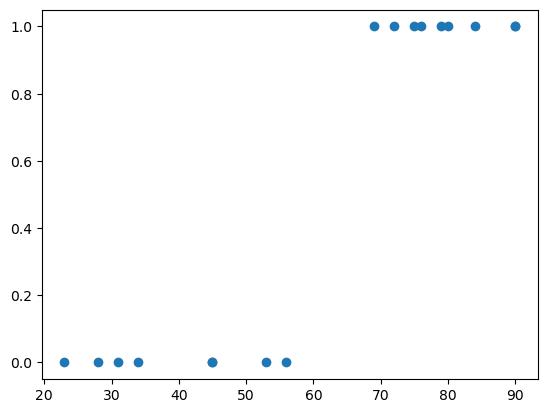

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# get data
data = pd.read_csv('./examdata.csv')
x = data.loc[:, 'Exam']
y = data.loc[:, 'Pass']
# plot
plt.figure()
plt.scatter(x, y)
plt.show()

可以看出，数据的分布情况是离散的。跟我们前面线性回归里的散点图对比一下，二者的数据数据分布情况很不一样 ⬇️

<img src="../../../../images/分类/逻辑回归/离散数据与连续数据.png" width="500" />

以上两种情况的目标其实都是一致的——**找到适合的曲线对数据进行拟合**。很自然的，对于离散的数据来说，可以用 "分段函数" 进行拟合 ⬇️

例 ： $y :\begin{cases} 1, x>=60\\ 2, x<60 \end{cases}$



## 2. Sigmoid函数

然而，分段函数并不适合进行计算机中的数学计算，最好是能够把这个拟合曲线抽象为一个函数。
正好， **Sigmoid** 函数： $ y=\frac{1}{1+ e^{-x}} $

可以满足我们的需求。我们把 **Sigmoid函数** 的曲线画出来如下 ⬇️

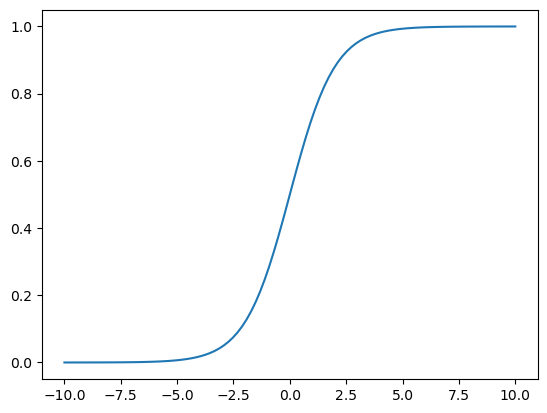

In [15]:
# make data
x_s = np.linspace(-10, 10, 100) # 1-10之间，生成100个数
y_s = 1 / (1 + pow(np.e, -(x_s)))
# plot
plt.figure()
plt.plot(x_s, y_s)
plt.show()

接着，我们用 **Sigmoid函数** 对上面的考试数据进行拟合如下 ⬇️

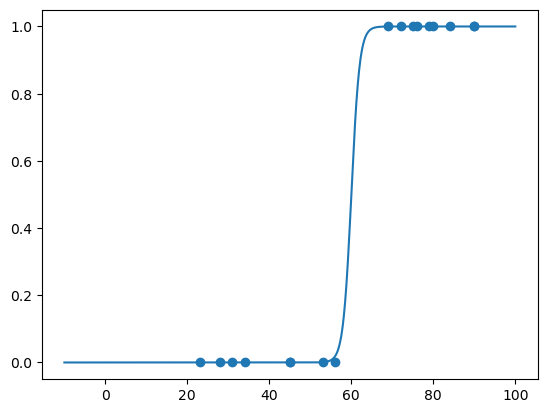

In [16]:
# make data
x_sigmoid = np.linspace(-10, 100, 1000) # 1-10之间，生成100个数
y_sigmoid = 1 / (1 + pow(np.e, -(x_sigmoid-60))) #曲线往右平移60

# plot
plt.figure()
plt.scatter(x, y) # 考试成绩
plt.plot(x_sigmoid, y_sigmoid)
plt.show()

从上面曲线可以看到，**Sigmoid函数**基本符合我们对离散数据拟合的需求，尽管有些参数依旧需要继续进行调整验证。

## 3. 从二维到多维，从一元到多元

在现实情况中，我们的分类问题往往有多个影响因素。比如说我们最常见的水果：苹果和梨。区分一个水果是苹果还有梨的因素有很多：
- 颜色
- 大小
- 形状
- ...
以上多种因素综合起来考虑，得到一个正确的分类的结果：苹果 or 梨。

那么在这里，我们可以把这些因素看成一个函数h(x1, x2, ...),分类结果为y，那么同样可以用**Sigmoid函数**去进行拟合（假设只有 x1，x2 两个自变量）⬇️

 $ y=\frac{1}{1+ e^{-h(x_1, x_2)}} $


用图像把二维和三维的**Sigmoid函数**简单画出来，可以对这个模型有更进一步的理解。

<img src="../../../../images/分类/逻辑回归/sigmoid函数图像.png" width="500" />

## 4. 从直线到曲线

在上面有多元的分类问题的图像中，可以看到x1和x2之间的关系是线性的，即$ h(x_1, x_2)=0 $是一个线性的表达式。

 <img src="../../../../images/分类/逻辑回归/三维-线性.png" width="400" />

 显而易见，我们可以用：$ h(x_1, x_2) =\theta_0 + \theta_1 X_1 + \theta_2 X_2 = 0 $ 这个边界函数去拟合，然后根据损失函数计算出参数即可。


以此类推，如果x1与x2之间的关系不是线性关系，而是一个曲线呢？如下图所示 ⬇️

 <img src="../../../../images/分类/逻辑回归/曲线拟合.png" width="400" />

可以看出，x1与x2是非线性关系，则需要用曲线的方式去进行拟合。那么我们可以用下二次边界函数对数据进行拟合：

 $ h(x_1, x_2) =\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = 0 $

 y与h(x_1, x_2)的关系依旧不变，依旧是用 **Sigmoid函数** ⬇️
 
 $ y=\frac{1}{1+ e^{-h(x_1, x_2)}} $

 同样的，假设  
 
 $ h(x_1, x_2) =\theta_0 + \theta_1 X_1 + \theta_2 X_2+ \theta_3 X_1^2 + \theta_4 X_2^2 + \theta_5 X_1 X_2 = X_1^2 + X_2^2 - 1 = 0 $ （曲线就是个圆哈哈哈）

则用Sigmoid函数有：

 $ y=\frac{1}{1+ e^{-h(x_1, x_2)}} $

 代入可得 ⬇️

 $ y = \frac{1}{1 + e ^{-(x_1 ^ 2 + x_2 ^ 2 - 1)}} $

 我们用代码把上面的过程演示出来如下：


[[0.99999996 0.99999994 0.99999992 ... 0.99999992 0.99999994 0.99999996]
 [0.99999994 0.99999991 0.99999988 ... 0.99999988 0.99999991 0.99999994]
 [0.99999992 0.99999988 0.99999983 ... 0.99999983 0.99999988 0.99999992]
 ...
 [0.99999992 0.99999988 0.99999983 ... 0.99999983 0.99999988 0.99999992]
 [0.99999994 0.99999991 0.99999988 ... 0.99999988 0.99999991 0.99999994]
 [0.99999996 0.99999994 0.99999992 ... 0.99999992 0.99999994 0.99999996]]


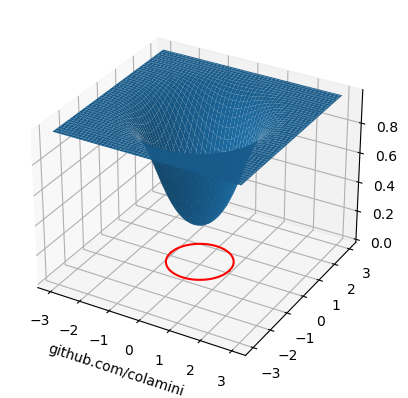

In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd

# Make data
X1 = np.linspace(-1, 1, 100)
X2_1 = np.sqrt(abs(1 - pow(X1, 2)))
X2_2 = -np.sqrt(abs(1 - pow(X1, 2)))

X1_new = np.linspace(-3, 3, 100)
X2_new = np.linspace(-3, 3, 100)
X1_new, X2_new = np.meshgrid(X1_new, X2_new)

Y = 1 / (1 + pow(np.e, -(X1_new ** 2 + X2_new ** 2 - 1)))

print(Y)
# Plot the surface
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

plt.plot(X1, X2_1, 'red')
plt.plot(X1, X2_2, 'red')

plt.xlabel('github.com/colamini')
ax.plot_surface(X1_new, X2_new, Y)

plt.show()

从上图可以看出，逻辑回归是我们在简单分类问题中解决问题的利器。

总的来说，逻辑回归是用于解决分类问题的一种模型。主要应用场景：二分类问题。
